# Why should I scale my data?

Common wisdom has it that data should be centered and scaled, but why is that?
In this part of the tutorial we will look at a dataset which is initially badly scaled.

[Example from "A Practical Guide to Support Vector Classification" by Hsu, Chang, Lin](http://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf)

In [1]:
#Start with imports
import warnings
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
#read in the data

#it is in SVMlight format - so we use the corresponding dataset loader from sklearn
warnings.simplefilter("ignore") #the function gives warnings, going to ignore them here.
X_train, y_train = load_svmlight_file("svmguide1")
X_train = X_train.todense()


X_test, y_test = load_svmlight_file("svmguide1.t")
X_test = X_test.todense()

#doing something sneaky here: mis-scaling my data
X_train[:,3] = (X_train[:,3] - np.mean(X_train[:,3]))*100
X_test[:,3] = (X_test[:,3] - np.mean(X_train[:,3]))*100

In [4]:
#show the first few rows of X and y
print(X_train[:5, :])
print(y_train[:5])

[[ 2.61730000e+01  5.88670000e+01 -1.89469700e-01  9.45733547e+02]
 [ 5.70739700e+01  2.21404000e+02  8.60795900e-02  7.24623547e+02]
 [ 1.72590000e+01  1.73436000e+02 -1.29805300e-01  9.36663547e+02]
 [ 2.17794000e+01  1.24953100e+02  1.53885300e-01  3.70498355e+03]
 [ 9.13399700e+01  2.93569900e+02  1.42391800e-01  4.48750355e+03]]
[1. 1. 1. 1. 1.]


In [7]:
X_train.std(0)

matrix([[3.28543307e+01, 9.54577357e+01, 2.42442173e-01, 3.81673145e+03]])

In [8]:
#learn a classifier to predict X from y
#using default settings
#kernel=rbf
#C=1
#gamma=0.1
classifier = SVC()

In [9]:
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.5

In [10]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma': [1e-1, 1e-2,1e-3, 1e-4, 1e-5],
                     'C': [0.01, 0.1, 1, 10, 100]}]
        
clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [11]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
clf.score(X_test, y_test)

0.4515

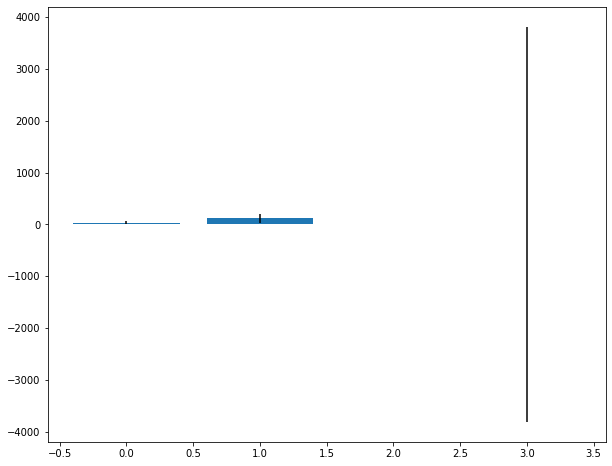

In [17]:
plt.figure(figsize=(10,8))
plt.bar(range(4), [np.mean(X_train[:, i]) for i in range(4)], yerr=[np.std(X_train[:, i]) for i in range(4)])
#plt.yscale('log')
plt.show()

It looks like the 3rd dimension would completely dominate any kernel calculation:

$K(x_1, x_2) = e^{-(<x_1,x_2>)/\gamma} \approx e^{-(x_1[3]*x_2[3])/\gamma}$ since `x[3]` is so much bigger
What would happen if I just used the third column of my data

In [18]:
X_train_trunc = X_train[:,3]
X_test_trunc = X_test[:,3]

clf.fit(X_train_trunc, y_train)
clf.score(X_test_trunc, y_test)

0.5

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

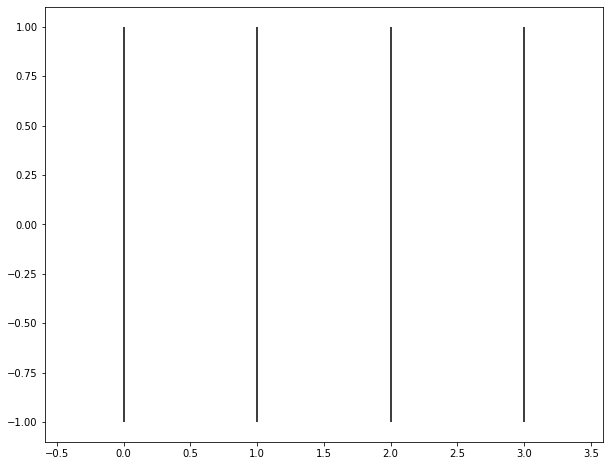

In [20]:
plt.figure(figsize=(10,8))
plt.bar(range(4), [np.mean(X_train[:, i]) for i in range(4)], yerr=[np.std(X_train[:, i]) for i in range(4)])
#plt.yscale('log')
plt.show()

In [21]:
clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
clf.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
clf.score(X_test, y_test)

0.5

Nothing changed!! what happened?
Well, I need to scale my training set too!

In [24]:
X_test = scaler.transform(X_test) #note - scale with the same transform function used to transform the train data

In [25]:
clf.score(X_test, y_test) 

0.70675

GridSearchCV(cv=5,
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)